# 4. MODEL COMPARISON
    - Logistic Regression
    - Naive Bayes
    - Support Vector Classifier
    - Random Forest
    - XGBoost Classifier

In [1]:
import warnings
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

df_train = pd.read_csv('Final_Train_dataset.csv')
X_train  = df_train.iloc[:,:-1]
y_train  = df_train.VirusDetected

df_test = pd.read_csv('Final_Test_dataset.csv')
X_test  = df_test.iloc[:,:-1]
y_test  = df_test.VirusDetected

In [2]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression(C        = 78.47,
                                                         max_iter = 100,
                                                         solver   = 'lbfgs')))
models.append(('SVC', SVC(C      = 5,
                          degree = 100,
                          gamma  = 'scale',
                          kernel = 'linear')))

models.append(('Random Forest', RandomForestClassifier(n_estimators      = 50,
                                                       min_samples_split = 2,
                                                       min_samples_leaf  = 1,
                                                       max_features      = 'auto',
                                                       max_depth         = 5,
                                                       criterion         = 'gini')))
models.append(('XGBoost',XGBClassifier(colsample_bytree = 0.3,
                                       learning_rate    = 0.05,
                                       max_depth        = 1, 
                                       min_child_weight = 1)))

import time
start_time = time.time()

for name, model in models:
    fitting  = model.fit(X_train, y_train)
    y_pred   = fitting.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  
    print('Accuracy: ',round(accuracy, 5), name,"--- %s seconds ---" % (time.time() - start_time) )
    
for name, model in models:
    fitting   = model.fit(X_train, y_train)
    y_pred    = fitting.predict(X_test)
    precision = precision_score(y_test, y_pred)   
    print('Precision: ',round(precision, 5), name,"--- %s seconds ---" % (time.time() - start_time) )
    
for name, model in models:
    fitting   = model.fit(X_train, y_train)
    y_pred    = fitting.predict(X_test)
    recall    = recall_score(y_test, y_pred)   
    print('Sensitivity: ',round(recall, 5), name,"--- %s seconds ---" % (time.time() - start_time) )
    
for name, model in models:
    fitting    = model.fit(X_train, y_train)
    y_pred     = fitting.predict(X_test)
    pre_recall = f1_score(y_test, y_pred)   
    print('F1-Score: ',round(pre_recall, 5), name,"--- %s seconds ---" % (time.time() - start_time) )

Accuracy:  0.95745 Naive Bayes --- 0.0049076080322265625 seconds ---
Accuracy:  0.91489 Logistic Regression --- 0.010931968688964844 seconds ---
Accuracy:  0.95745 Random Forest --- 0.05999875068664551 seconds ---
Accuracy:  0.95745 XGBoost --- 0.1029055118560791 seconds ---
Precision:  1.0 Naive Bayes --- 0.10690522193908691 seconds ---
Precision:  0.93333 Logistic Regression --- 0.11199092864990234 seconds ---
Precision:  1.0 Random Forest --- 0.16299962997436523 seconds ---
Precision:  1.0 XGBoost --- 0.20690608024597168 seconds ---
Sensitivity:  0.93333 Naive Bayes --- 0.2109053134918213 seconds ---
Sensitivity:  0.93333 Logistic Regression --- 0.22191095352172852 seconds ---
Sensitivity:  0.93333 Random Forest --- 0.27100229263305664 seconds ---
Sensitivity:  0.93333 XGBoost --- 0.3149068355560303 seconds ---
F1-Score:  0.96552 Naive Bayes --- 0.31790661811828613 seconds ---
F1-Score:  0.93333 Logistic Regression --- 0.3241112232208252 seconds ---
F1-Score:  0.96552 Random Forest 

- Naive Bayes Technique outperforms all algorithms in terms of execution time with a better or at least equal classification performance 

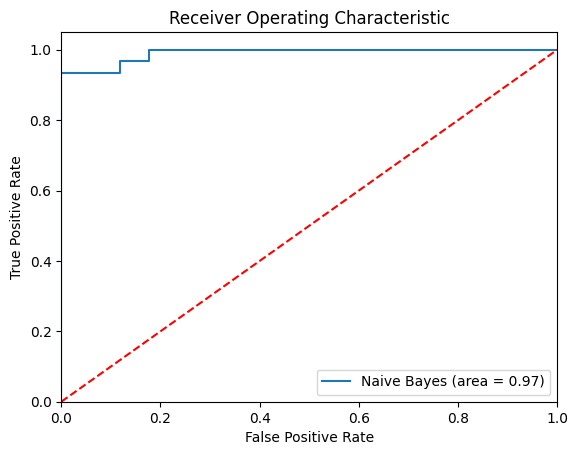

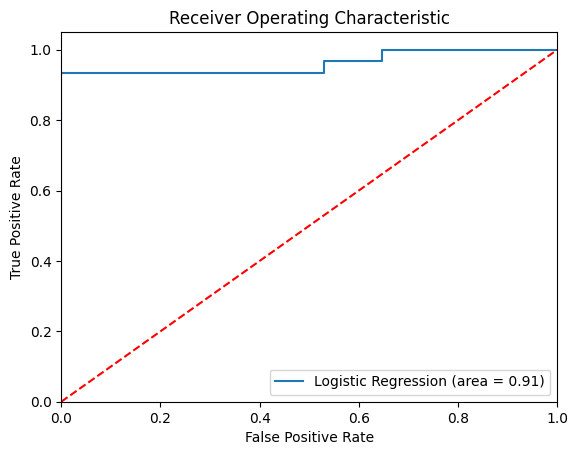

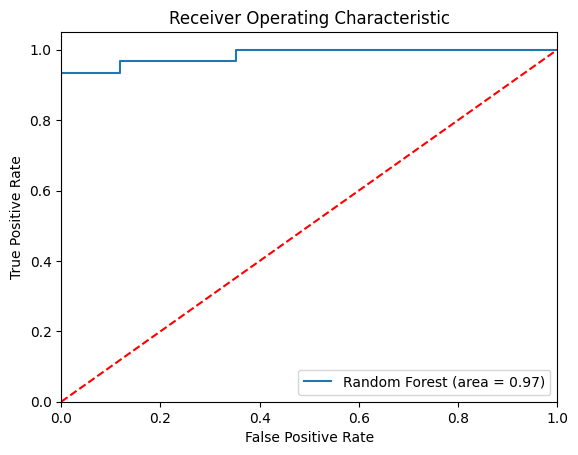

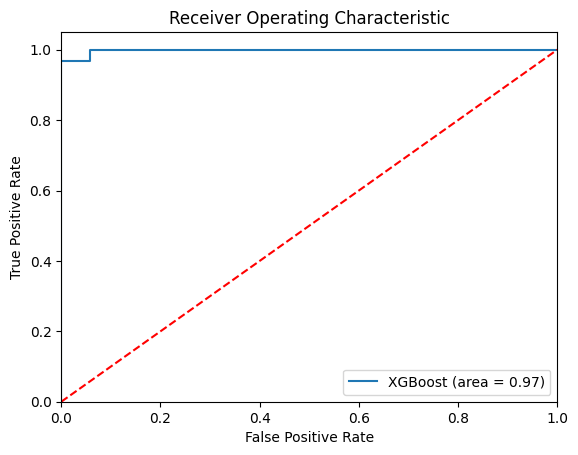

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

for name, model in models:
    svc_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr_svc, tpr_svc, label='{} (area = %0.2f)'.format(name) % svc_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic'.format(name))
    plt.legend(loc="lower right")
    plt.show()
    


## Deployment

In [4]:
optimal_model = GaussianNB().fit(X_train, y_train)

In [5]:
import pickle
file = open("naive_bayes.pkl", 'wb')
pickle.dump(optimal_model, file)